In [1]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
from gluonts.dataset.util import to_pandas
from gluonts.dataset.common import ListDataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "../LSTM-Neural-Network-for-Time-Series-Prediction/data/NATHAN-MACKINNON-8477492.csv"
df = pd.read_csv(url, header=0, index_col=0)
df = df.set_index('Date')

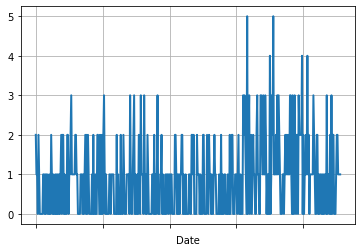

In [8]:
df['Total_Points'].plot(linewidth=2)
plt.grid(which='both')
plt.show();

In [4]:
training_data = ListDataset(
    [{"start": df.index[0], 
      "target": df.Total_Points[:"2018-09-01 00:00:00"]}],
    freq = "D"
)

In [5]:
estimator = DeepAREstimator(freq="D", prediction_length=82, trainer=Trainer(epochs=10, learning_rate=0.0005))
predictor = estimator.train(training_data=training_data)

INFO:root:Start model training
INFO:root:Number of parameters in DeepARTrainingNetwork: 13463
INFO:root:Epoch[0] Learning rate is 0.0005
100%|██████████| 50/50 [00:07<00:00,  6.66it/s, avg_epoch_loss=1.31]
INFO:root:Epoch[0] Elapsed time 7.515 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=1.313987
INFO:root:Epoch[1] Learning rate is 0.0005
100%|██████████| 50/50 [00:06<00:00,  7.33it/s, avg_epoch_loss=1.2]
INFO:root:Epoch[1] Elapsed time 6.826 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=1.200336
INFO:root:Epoch[2] Learning rate is 0.0005
100%|██████████| 50/50 [00:07<00:00,  6.74it/s, avg_epoch_loss=1.05]
INFO:root:Epoch[2] Elapsed time 7.424 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=1.048363
INFO:root:Epoch[3] Learning rate is 0.0005
100%|██████████| 50/50 [00:08<00:00,  5.67it/s, avg_epoch_loss=0.844]
INFO:root:Epoch[3] Elapsed time 8.821 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=0.843716
INFO:root:Epoch[4] Learning rate is 0.

Points Predictions: 57.45882034301758


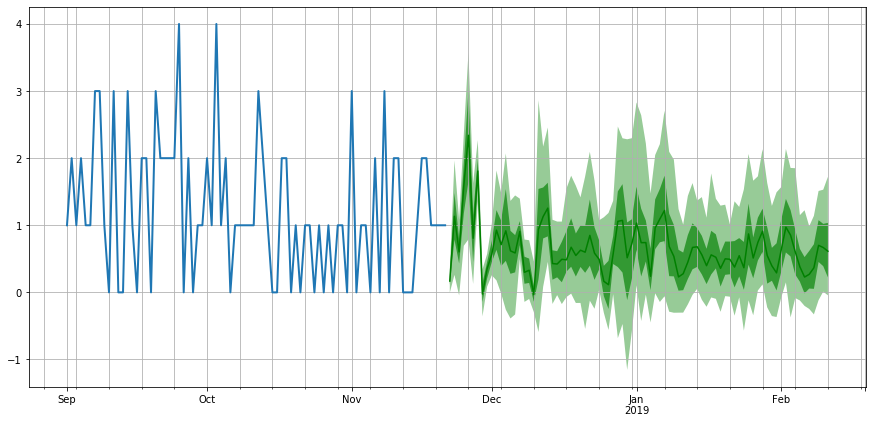

In [48]:
test_data = ListDataset(
    [{"start": "2018-09-01 00:00:00", 
      "target": df.Total_Points["2018-09-01 00:00:00":]}],
    freq = "D"
)

plt.figure(figsize=(15,7))
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-82:].plot(linewidth=2)
    forecast.plot(color='g')
    total_pts_pred = forecast.mean.clip(0).sum()
    print(f'Points Predictions: {total_pts_pred}')
plt.grid(which='both');